In [122]:
import nltk
from nltk.corpus import twitter_samples
from nltk.tokenize import TweetTokenizer
import re, string
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
nltk.download('twitter_samples')
nltk.download('wordnet')
nltk.download('stopwords')
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding,Bidirectional,Dense,Conv1D,Flatten,LSTM,GlobalMaxPooling1D,Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import tensorflow as tf

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/amit/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/amit/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/amit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [152]:
tknzr = TweetTokenizer()
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')


In [153]:
df = pd.DataFrame(data = positive_tweets,columns = ['Tweet'])
df['Sentiment'] = 1
df2 = pd.DataFrame(data = negative_tweets,columns = ['Tweet'])
df2['Sentiment'] = -1
df = df.append(df2, ignore_index=True)
df


,Tweet,Sentiment
0,#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :),1
1,@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!,1
2,@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!,1
3,@97sides CONGRATS :),1
4,yeaaaah yippppy!!! my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days,1
...,...,...
9995,I wanna change my avi but uSanele :(,-1
9996,MY PUPPY BROKE HER FOOT :(,-1
9997,where's all the jaebum baby pictures :((,-1
9998,But but Mr Ahmad Maslan cooks too :( https://t.co/ArCiD31Zv6,-1


In [8]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tag import pos_tag
def lemmatize_sentence(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(tokens):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence



In [154]:
# Tokenise
tknzr = TweetTokenizer()
df['Tweet'] = df['Tweet'].apply(tknzr.tokenize)

In [155]:
# Lematise Sentence
df['Tweet'] = df['Tweet'].apply(lemmatize_sentence)

In [156]:
def remove_noise(tweet_tokens): #, stop_words = ()):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

In [157]:
df['Tweet'] = df['Tweet'].apply(remove_noise)

In [15]:
pd.set_option('display.max_colwidth', -1) 
df['Tweet'].head(30)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


0     [#followfriday, top, engage, member, community, week, :)]                                             
1     [hey, james, odd, :/, please, call, contact, centre, 02392441234, able, assist, :), many, thanks]     
2     [listen, last, night, :), bleed, amazing, track, scotland]                                            
3     [congrats, :)]                                                                                        
4     [yeaaaah, yippppy, accnt, verify, rqst, succeed, get, blue, tick, mark, fb, profile, :), 15, day]     
5     [one, irresistible, :), #flipkartfashionfriday]                                                       
6     [like, keep, lovely, customer, wait, long, hope, enjoy, happy, friday, lwwf, :)]                      
7     [second, thought, ’, enough, time, dd, :), new, short, enter, system, sheep, must, buy]               
8     [jgh, go, bayan, :d, bye]                                                                             
9     [act, mischie

In [16]:
from nltk import FreqDist
#all_words = ' '.join([text for text in cleaned])
flattened_tokeninized_final = [i for j in df['Tweet'] for i in j]
fdist=FreqDist(flattened_tokeninized_final)
print(fdist.most_common(100))
print('\n')

pos_all_words = [i for j in df['Tweet'][df['Sentiment'] == 1] for i in j]
fdist_pos=FreqDist(pos_all_words)
print(fdist_pos.most_common(100))
print('\n')

neg_all_words = [i for j in df['Tweet'][df['Sentiment'] == -1] for i in j]
fdist_neg=FreqDist(neg_all_words)
print(fdist_neg.most_common(100))

[(':(', 4586), (':)', 3693), (':-)', 701), (':d', 658), ('...', 622), ('get', 589), ("i'm", 526), ('follow', 513), (':-(', 501), ('love', 474), ('thanks', 465), ('like', 447), ('go', 442), ('u', 438), ('good', 418), ('day', 386), ('please', 373), ('want', 342), ('see', 340), ('miss', 318), ('know', 300), ('time', 285), ('back', 284), ('thank', 284), ('one', 280), ('make', 263), ('work', 239), ('..', 237), ('much', 228), ("can't", 223), ('today', 220), ('happy', 218), ('really', 212), ('♛', 210), ('》', 210), ('hi', 207), ('new', 199), ('hope', 196), ('great', 195), ('look', 195), ('think', 192), ('come', 183), ('im', 182), ('need', 181), ('still', 172), ('say', 170), ('sorry', 170), ('feel', 165), ('us', 161), ('<3', 160), ('would', 154), ('oh', 145), (':p', 139), ('week', 138), ('well', 137), ('sleep', 137), ("i'll", 132), ('morning', 129), ("that's", 128), ('sad', 127), ('wanna', 124), ('people', 124), ('always', 123), ('yes', 122), ('let', 120), ('last', 118), ('thing', 118), ('watch

In [158]:
tokenized_tweet = df['Tweet']
for i in range(len(df['Tweet'])):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [183]:
#Shuffle the dataframe
df = df.sample(frac=1)
df




df.to_pickle('SentimentTweetsDataset') 

In [185]:
df = pd.read_pickle('SentimentTweetsDataset')
df

,Tweet,Sentiment
4821,see uni .. talent :),1
4529,think ’ like mate :),1
6361,young outlive >:(,-1
289,fat co probably eat yuna :d :d :d,1
6730,craving pizza :(,-1
...,...,...
7853,yes that's scary sight see frail people car lottery rid near people always hold breath :(,-1
1331,u r smart real life u act smart webz :-),1
7015,eyyah :( man utd bear ... best,-1
8928,get sick :(,-1


In [27]:
import os
import os.path
import shutil

In [28]:
d = os.getcwd()

In [160]:
from pathlib import Path

data_folder = Path("data/glove.6B")
file_to_open = data_folder / "glove.6B.100d.txt"

f = open(file_to_open)


In [161]:
df['Tweet'] = tokenized_tweet

train['Text'] = tokenized_tweet[:7000]
test['Text'] = tokenized_tweet[7000:]

In [162]:
train['Sentiment'] = df['Sentiment'][:7000]
test['Sentiment'] = df['Sentiment'][7000:]


In [163]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train['Text'])

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 9077


In [177]:
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 15
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train.Text),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test.Text),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (7000, 15)
Testing X Shape: (3000, 15)


In [165]:
n = 6
print(x_train[n])
print(train[n])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    8   65   97 1231   80  119   29   67   16   40 3298]
like keep lovely customer wait long hope enjoy happy friday lwwf :)


In [166]:
print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (7000, 40)
Testing X Shape: (3000, 40)


In [167]:
labels = train.Sentiment.unique().tolist()
train.Sentiment
encoder = LabelEncoder()
encoder.fit(train.Sentiment.to_list())
y_train = encoder.transform(train.Sentiment.to_list())
y_test = encoder.transform(test.Sentiment.to_list())
train.Sentiment.to_list()

[1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 

In [168]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (7000, 1)
y_test shape: (3000, 1)


In [169]:
EMBEDDING_DIM = 100
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10

In [170]:
embeddings_index = {}


for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [171]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [172]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

In [173]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [178]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [179]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [180]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Training on CPU...


In [181]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Train on 7000 samples, validate on 3000 samples
Epoch 1/10
7000/7000 [==============================] - 24s 3ms/sample - loss: 0.6950 - acc: 0.4921 - val_loss: 0.6942 - val_acc: 0.5013
Epoch 2/10
7000/7000 [==============================] - 8s 1ms/sample - loss: 0.6943 - acc: 0.5004 - val_loss: 0.6940 - val_acc: 0.5003
Epoch 3/10
7000/7000 [==============================] - 8s 1ms/sample - loss: 0.6934 - acc: 0.5117 - val_loss: 0.6937 - val_acc: 0.4950
Epoch 4/10
7000/7000 [==============================] - 8s 1ms/sample - loss: 0.6921 - acc: 0.5170 - val_loss: 0.6943 - val_acc: 0.4947
Epoch 5/10
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.6906 - acc: 0.5314 - val_loss: 0.6947 - val_acc: 0.4927
Epoch 6/10
7000/7000 [==============================] - 8s 1ms/sample - loss: 0.6884 - acc: 0.5434 - val_loss: 0.6976 - val_acc: 0.4877
Epoch 7/10
7000/7000 [==============================] - 8s 1ms/sample - loss: 0.6850 - acc: 0.5559 - val_loss: 0.7006 - val_acc: 0.4803

KeyError: 'accuracy'

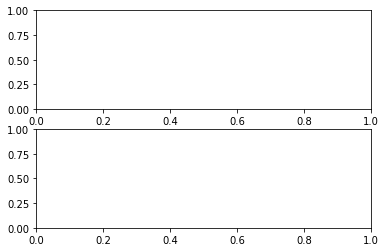

In [129]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [131]:
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"


scores = model.predict(x_test, verbose=1, batch_size=1000)
y_pred_1d = [decode_sentiment(score) for score in scores]

3000/3000 [==============================] - 2s 755us/sample


In [132]:
y_pred_1d

['Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Negative',

In [136]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

In [140]:
cnf_matrix = confusion_matrix(test.Sentiment.to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=test.Sentiment.unique(), title="Confusion matrix")
plt.show()

ValueError: Mix of label input types (string and number)

In [138]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(classification_report(list(test.Sentiment), y_pred_1d))

ValueError: Mix of label input types (string and number)

In [144]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

In [145]:
max_words = 10
max_len = 
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(train['Text'])
sequences = tok.texts_to_sequences(train['Text'])
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [146]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [147]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 50)           5000      
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

In [150]:
model.fit(sequences_matrix,y_train,batch_size=128,epochs=10, validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Train on 5600 samples, validate on 1400 samples
Epoch 1/10
5600/5600 [==============================] - 43s 8ms/step - loss: 1.0963 - accuracy: 0.5143 - val_loss: 0.6974 - val_accuracy: 0.4814
Epoch 2/10
5600/5600 [==============================] - 45s 8ms/step - loss: 0.6913 - accuracy: 0.5288 - val_loss: 0.6943 - val_accuracy: 0.5171
Epoch 3/10
5600/5600 [==============================] - 52s 9ms/step - loss: 0.6903 - accuracy: 0.5289 - val_loss: 0.6970 - val_accuracy: 0.4814
